# Stroke Prediction

<a name="l1.1"></a>
## 1.1 Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

<a name="l1.2"></a>
## 1.2 Data Loading


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<a name="l2"></a>
# 2 Data Observation

<a name="l2.1"></a>
## 2.1 null values

In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<a name="l2.2"></a>
## 2.2 Duplicated Data

In [4]:
df.duplicated().sum()

0

<a name="l2.3"></a>
## 2.3 General Observation

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
for column in df:
    print(f"{column} - {len(df[column].unique())} : {df[column].unique()}")

id - 5110 : [ 9046 51676 31112 ... 19723 37544 44679]
gender - 3 : ['Male' 'Female' 'Other']
age - 104 : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 

<a name="l3"></a>
# 3 Preprocessing

<a name="l3"></a>
# 3.1 Data Cleaning

<a name="l3.1.1"></a>
# 3.1.1 Gender

In [8]:
print(df[df["gender"] == "Other"])
df1 = df[~(df["gender"] == "Other")]
print(df1.gender.unique())

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  
['Male' 'Female']


In [9]:
df1["gender"] = df1["gender"].replace(["Male", "Female"], [1, 0])

<a name="l3.1.2"></a>
#  3.1.2 Married

In [10]:
df1["ever_married"] = df1["ever_married"].replace(["Yes", "No"], [1, 0])
df1["ever_married"].unique()

array([1, 0])

<a name="l3.1.3"></a>
## 3.1.3 Other Object columns

In [11]:
dummies = pd.get_dummies(df1, columns = ["work_type", "Residence_type", "smoking_status"])
df2 = dummies
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,202.21,NaN,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0


<a name="l3.1.4"></a>
## 3.1.4 Droping useless columns

In [12]:
df2.drop(["id"], axis = 1, inplace = True)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,202.21,NaN,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0


<a name="l3.1.5"></a>
## 3.1.5 BMI

In [13]:
df2.dropna(axis = 0, inplace = True)
df2.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

<a name="l3.2"></a>
##  3.2 Encoding

In [14]:
scaler = StandardScaler()
columns = ["age", "avg_glucose_level", "bmi"]
df3 = df2.copy()
df3[columns] = scaler.fit_transform(df3[columns])
df3.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.069938,0,1,1,2.777797,0.981145,1,0,0,1,0,0,0,1,0,1,0,0
2,1,1.646336,0,1,1,0.014016,0.459086,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0.271847,0,0,1,1.484266,0.701016,1,0,0,1,0,0,0,1,0,0,0,1
4,0,1.601998,1,0,1,1.549325,-0.623231,1,0,0,0,1,0,1,0,0,0,1,0
5,1,1.690675,0,0,1,1.821493,0.013426,1,0,0,1,0,0,0,1,0,1,0,0


<a name="l3.3"></a>

## 3.3 Corr Matrix

In [15]:
df2.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.030280,0.021811,0.082950,-0.036380,0.053161,-0.026164,0.006904,-0.015031,0.012316,-0.038831,-0.022210,0.091732,0.004351,-0.004351,0.058065,0.039078,-0.093881,0.011623
age,-0.030280,1.000000,0.274395,0.257104,0.680742,0.236000,0.333314,0.232313,0.133544,-0.079399,0.120169,0.327306,-0.635044,-0.010795,0.010795,-0.389716,0.242874,0.124273,0.076743
hypertension,0.021811,0.274395,1.000000,0.115978,0.162350,0.180614,0.167770,0.142503,0.019207,-0.021345,-0.004581,0.111770,-0.126590,0.001140,-0.001140,-0.143270,0.062252,0.066671,0.028188
heart_disease,0.082950,0.257104,0.115978,1.000000,0.111203,0.154577,0.041322,0.137929,0.005077,-0.015315,-0.000239,0.081466,-0.088092,0.002409,-0.002409,-0.074503,0.071477,-0.020722,0.048667
ever_married,-0.036380,0.680742,0.162350,0.111203,1.000000,0.151657,0.341553,0.105051,0.137836,-0.092012,0.157102,0.191389,-0.545687,-0.004707,0.004707,-0.338433,0.176745,0.105062,0.106479
avg_glucose_level,0.053161,0.236000,0.180614,0.154577,0.151657,1.000000,0.175672,0.138984,0.017791,-0.013980,0.009124,0.069133,-0.101122,0.007441,-0.007441,-0.103122,0.073907,0.032225,0.011055
bmi,-0.026164,0.333314,0.167770,0.041322,0.341553,0.175672,1.000000,0.042341,0.079526,-0.028615,0.208205,0.072634,-0.448779,0.000293,-0.000293,-0.270481,0.107463,0.107847,0.088261
stroke,0.006904,0.232313,0.142503,0.137929,0.105051,0.138984,0.042341,1.000000,0.003537,-0.014152,0.014972,0.055338,-0.080990,-0.005988,0.005988,-0.075047,0.057443,0.010690,0.021513
work_type_Govt_job,-0.015031,0.133544,0.019207,0.005077,0.137836,0.017791,0.079526,0.003537,1.000000,-0.025750,-0.444120,-0.166176,-0.152715,-0.010209,0.010209,-0.098641,0.030283,0.046840,0.031370
work_type_Never_worked,0.012316,-0.079399,-0.021345,-0.015315,-0.092012,-0.013980,-0.028615,-0.014152,-0.025750,1.000000,-0.077658,-0.029057,-0.026703,-0.023419,0.023419,0.008984,-0.030404,0.035857,-0.028206


<a name="l4"></a>
# 4 Visualization

<a name="l4.1"></a>
# 4.1 Exploratory Data Analysis (EDA)

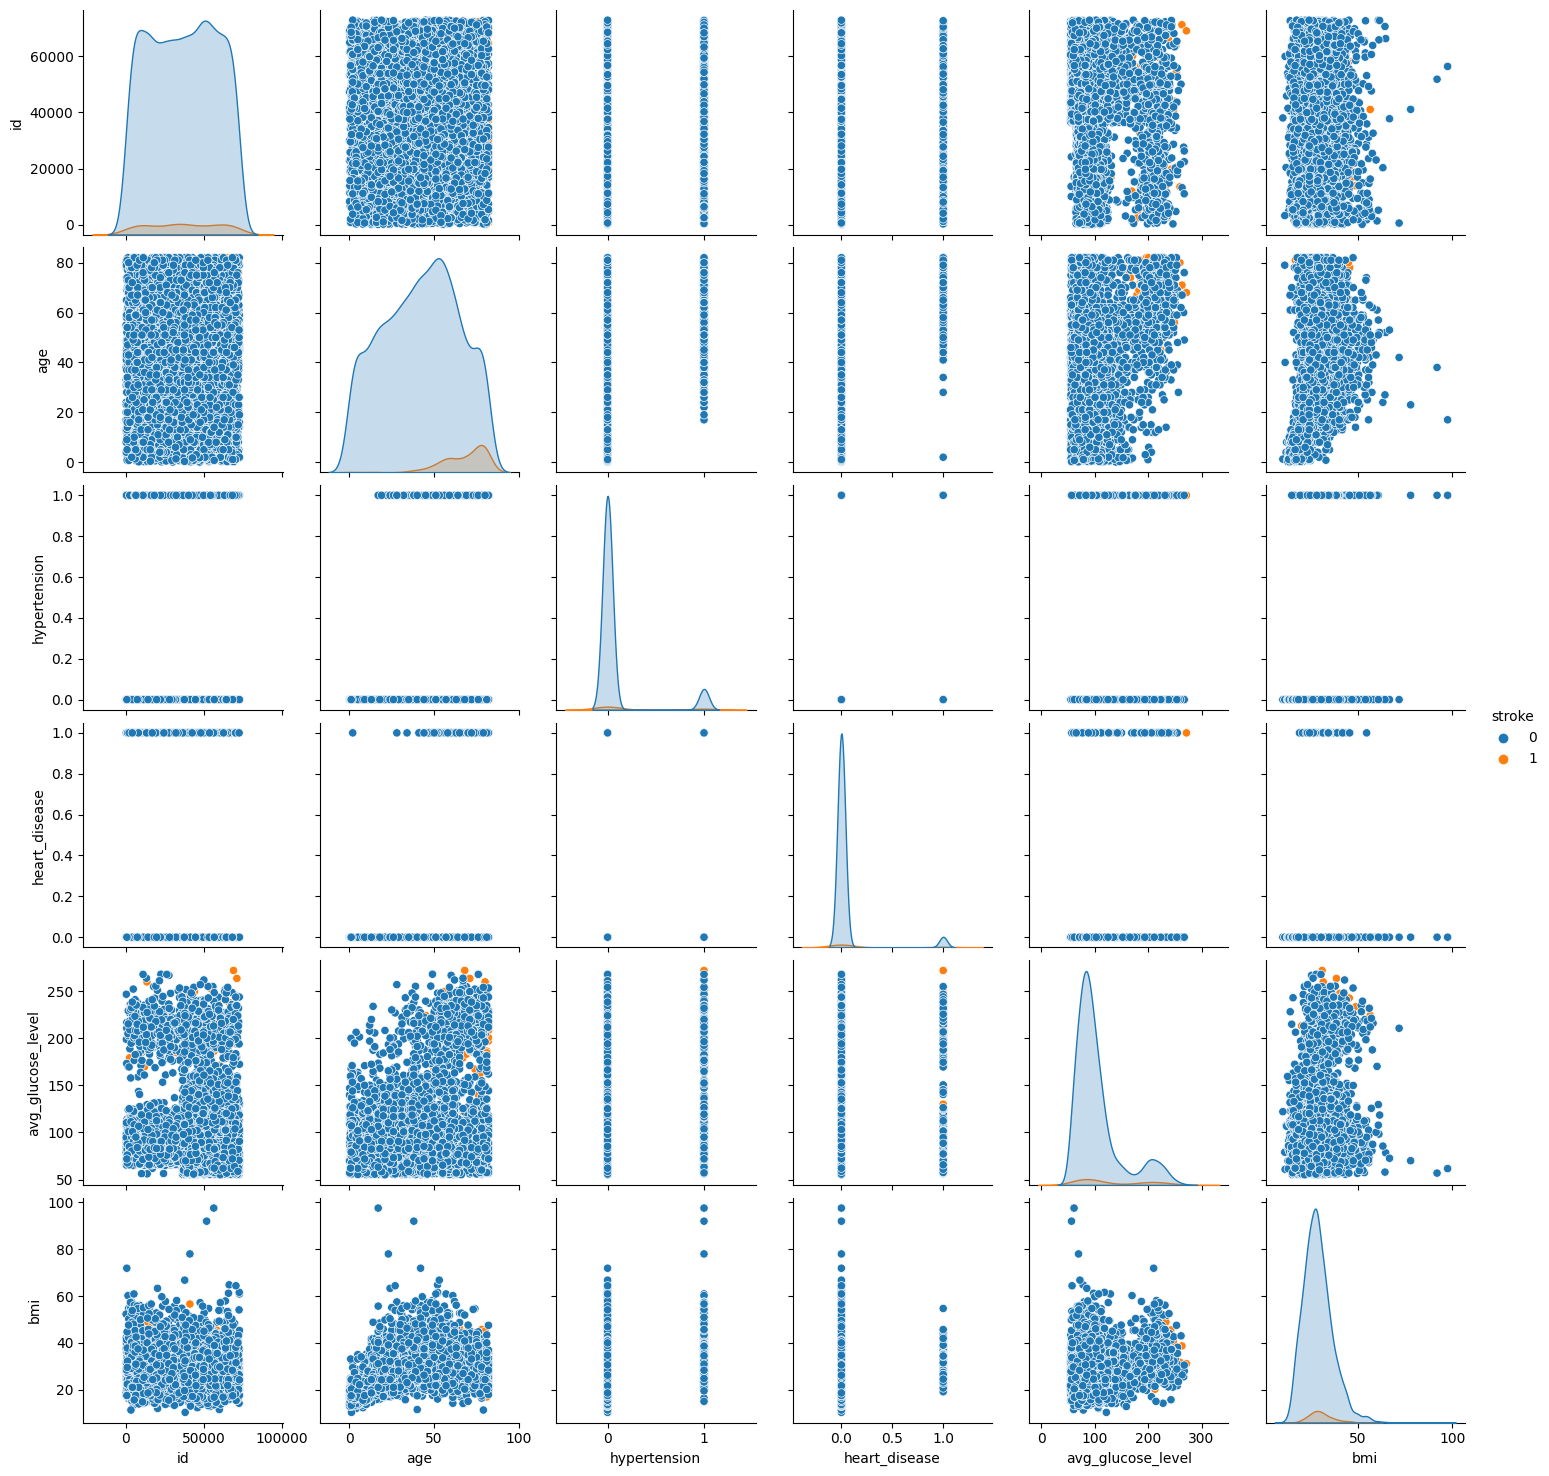

In [16]:
sn.pairplot(df, hue="stroke")

<a name="l4.2"></a>
# 4.2 Univate Analysis

Text(0.5, 1.02, 'Feature Distribution')

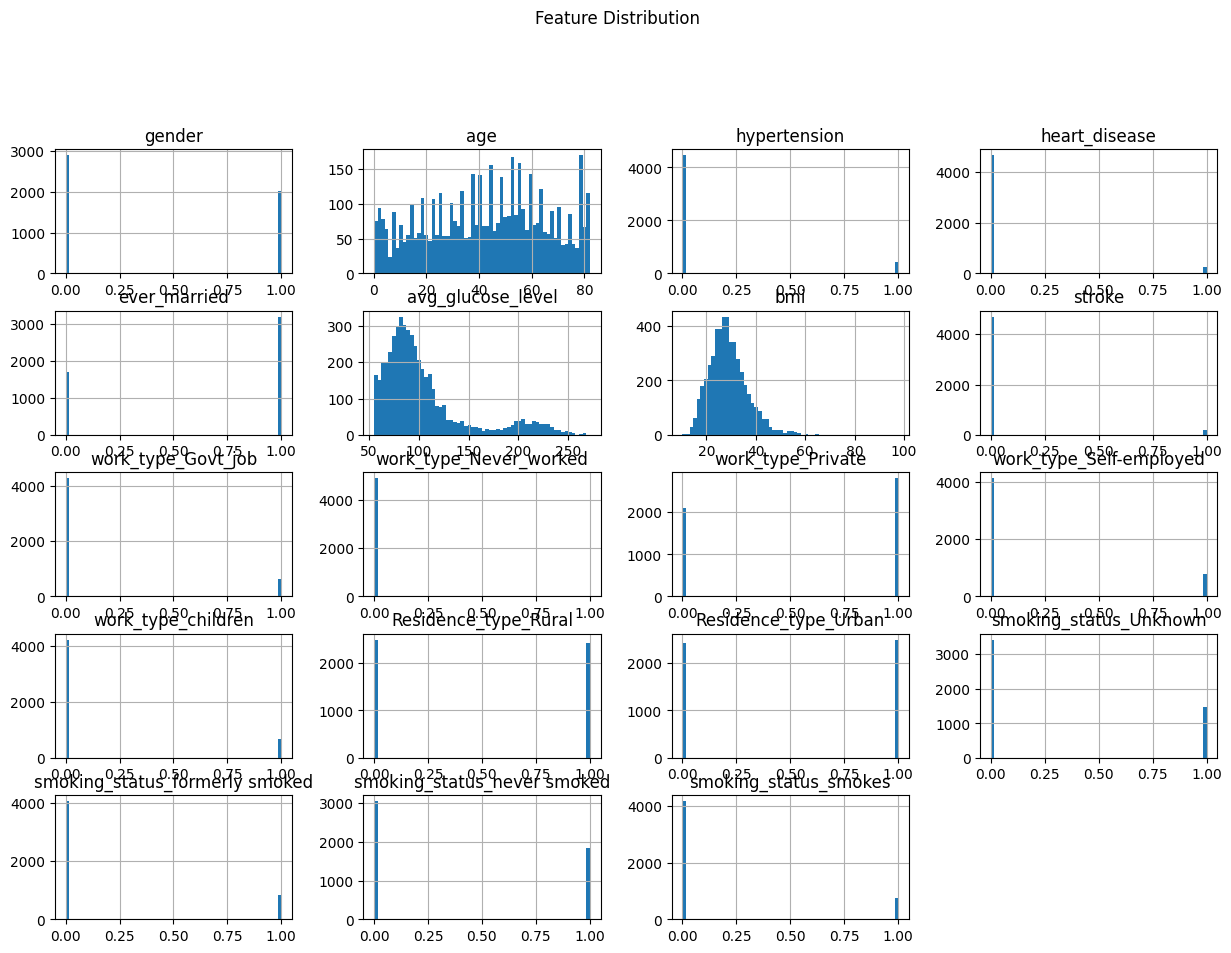

In [17]:
df2.hist(bins = 60, figsize = (15, 10))
plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center")

Text(0.5, 0.98, 'Feature Distribution')

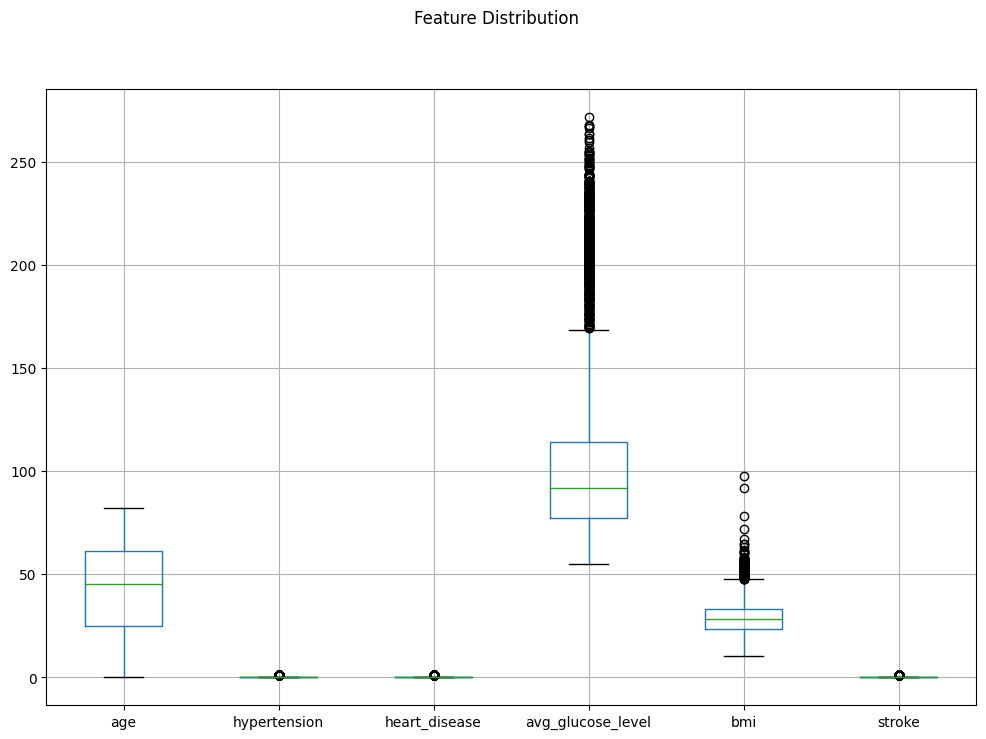

In [18]:
vis_df = df.drop(["id"], axis = 1)
vis_df.boxplot(figsize = (12, 8))
plt.suptitle("Feature Distribution")

As we are able to see that column avg glucos level and bmi has more outliers as compare to others.

In [19]:
def pieplot(df, column):
    label = df[column].unique().tolist()
    data = df[column].value_counts()
    plt.figure(figsize = (5, 5))
    plt.pie(data, labels = label, autopct = "%.0f%%")
    plt.title(column)
    plt.show()

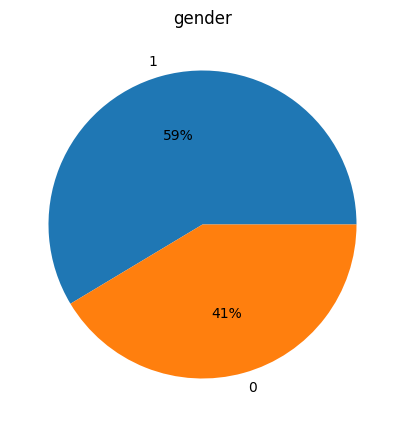

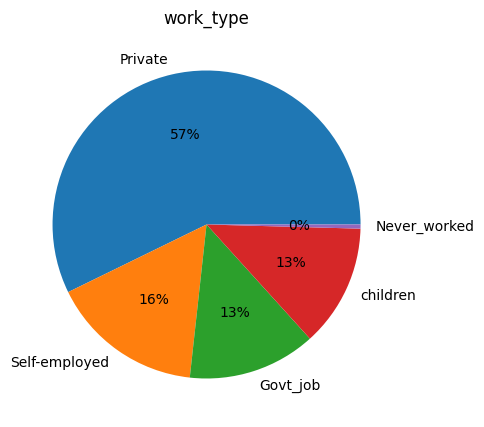

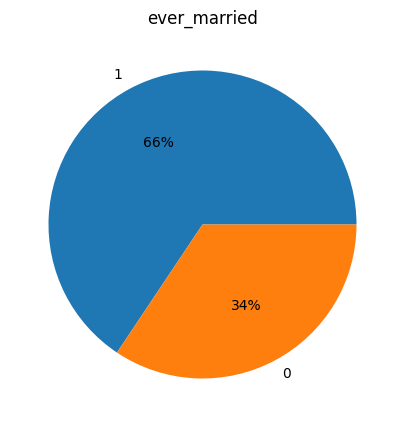

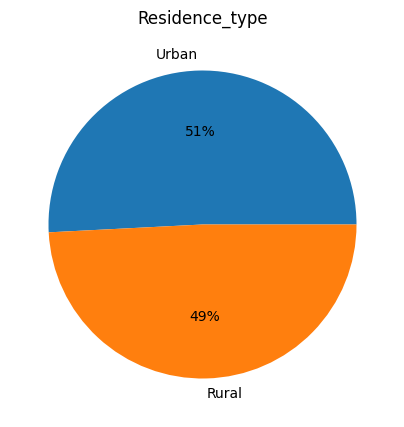

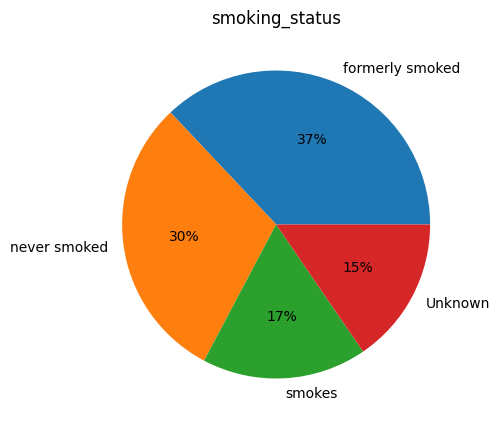

In [20]:
lists_of_plots = ["gender", "work_type", "ever_married", "Residence_type", "smoking_status"]
for i in range(len(lists_of_plots)):
    pieplot(df1, lists_of_plots[i])

<a name="l5"></a>
# 5 Params Tunning

In [21]:
X = df3.drop("stroke", axis = 1)
y = df3.stroke

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import Lasso
def gridSearch(X, y):
    params = {
        "Logistic Regression":{
            "model": LogisticRegression(),
            "param": {

            }
        },
        "L1 Reg":{
            "model": Lasso(),
            "param": {
                "alpha": [1, 2],
            }
        },
        "L2 Reg":{
            "model": RidgeClassifier(),
            "param": {
                "alpha": [1, 2],
            }
        },
        "Decision Tree Classifier":{
            "model" : DecisionTreeClassifier(),
            "param": {
                "criterion": ['gini', 'entropy'],
                "splitter": ["best", "random"]
            }
        },
        "Random Forest Classifier":{
            "model" : RandomForestClassifier(),
            "param": {
                "n_estimators" : [50, 100],
                "criterion": ['gini', 'entropy', 'log_loss'],
            }
        },
        "Supported Vector Machine Classification":{
            "model" : SVC(),
            "param": {
                "degree" : [1, 2, 3, 5],
                "gamma" : ["scale", "auto"]
            }
        },
        "KNN Classificatino":{
            "model" : KNeighborsClassifier(),
            "param": {
                "n_neighbors" : [3, 5, 10, 15, 20],
                "weights" : ["uniform", "distance"],
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size" :[5, 10, 30, 50, 100]
            }
        },
        "Gradient Boosting Classification":{
            "model" : GradientBoostingRegressor(),
            "param": {
                "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
                "learning_rate" : [0.1, 0.01, 0.001, 0.005],
                "n_estimators" : [10, 100, 200, 500]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
    for model_name, mp in params.items():
        gsc = RandomizedSearchCV(mp["model"], mp["param"], cv = cv, return_train_score = False).fit(X, y)
        scores.append({
            "model": model_name,
            "best_score" : gsc.best_score_,
            "best_params" : gsc.best_params_
        })
    return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])

In [23]:
scores = gridSearch(X, y)
scores

,model,best_score,best_params
0,Logistic Regression,0.953360,{}
1,L1 Reg,-0.001937,{'alpha': 1}
2,L2 Reg,0.953157,{'alpha': 1}
3,Decision Tree Classifier,0.920570,"{'splitter': 'random', 'criterion': 'entropy'}"
4,Random Forest Classifier,0.953157,"{'n_estimators': 50, 'criterion': 'gini'}"
5,Supported Vector Machine Classification,0.953157,"{'gamma': 'scale', 'degree': 1}"
6,KNN Classificatino,0.953157,"{'weights': 'uniform', 'n_neighbors': 20, 'lea..."
7,Gradient Boosting Classification,0.059480,"{'n_estimators': 500, 'loss': 'squared_error',..."


<a name="l6"></a>
# 6 Modeling

In [24]:
RFC_model = RandomForestClassifier(n_estimators= 50, criterion= 'gini')
RFC_model.fit(train_x, train_y)
RFC_model.score(test_x, test_y)

0.9470468431771895

<a name="l7"></a>
# 7 Evaluation

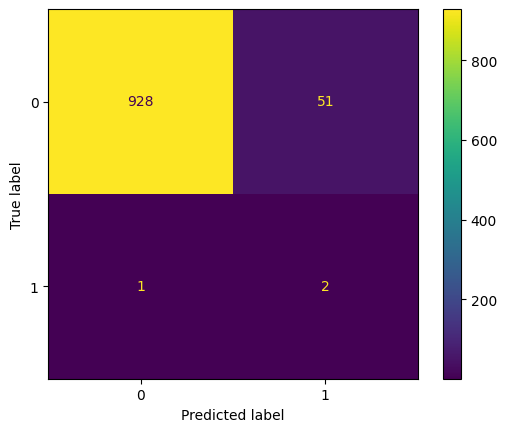

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = RFC_model.predict(test_x)
ConfusionMatrixDisplay.from_predictions(y_pred, test_y)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.67      0.04      0.07        53

    accuracy                           0.95       982
   macro avg       0.81      0.52      0.52       982
weighted avg       0.93      0.95      0.92       982



<a name="l8"></a>
# 8 Inbalance Data

In [27]:
df2.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

How the above observation has been shown, a class 1 has only 209 sample and this means the random model that always predict 0 can achieve 99.6 percent accuracy so for this reason we can use some extra features and ways like
- under Sampling
- Over Sampling
- Smote
....

<a name="l8.1"></a>
# 8.1 OverSampling

In [28]:
count_class_0, count_class_1 = df3.stroke.value_counts()

df_class_0 = df3[df3["stroke"] == 0]
df_class_1 = df3[df3["stroke"] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print(df_over.stroke.value_counts())

0    4699
1    4699
Name: stroke, dtype: int64


In [29]:
X_over = df_over.drop(["stroke"], axis = 1)
y_over = df_over.stroke

train_x_over, test_x_over, train_y_over, test_y_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [30]:
RFC_model_over = RandomForestClassifier(n_estimators= 50, criterion= 'gini')
RFC_model_over.fit(train_x_over, train_y_over)
RFC_model_over.score(test_x_over, test_y_over)

0.9909574468085106

In [31]:
from sklearn.metrics import classification_report
y_pred_over = RFC_model.predict(test_x_over)
print(classification_report(test_y_over, y_pred_over))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       926
           1       1.00      0.77      0.87       954

    accuracy                           0.89      1880
   macro avg       0.91      0.89      0.88      1880
weighted avg       0.91      0.89      0.88      1880



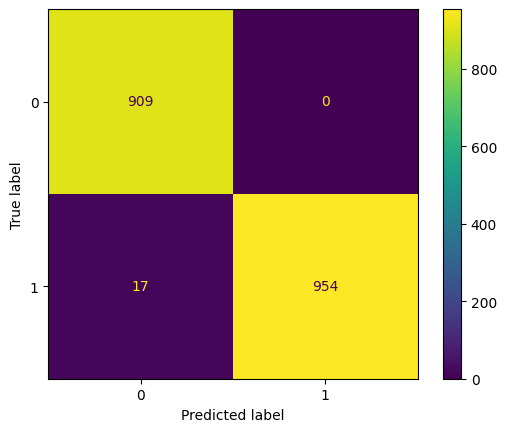

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_over = RFC_model_over.predict(test_x_over)
ConfusionMatrixDisplay.from_predictions(y_pred_over, test_y_over)